# Numerical solution of first-order equation -- Euler's method

Before we dig into numerically solving differential equations using ready-to-use packages provided by Python, it is worth understanding a little bit how a computer actually calculate the solution. 

The basic step in converting a differential equation into something that can be worked numerically is to replace derivatives with {\bf algebraic approximations}. Given a function $t \mapsto y(t)$, the obvious thing to do to approximate the derivative of $f$ is to use the standard difference quotient:
\begin{gather}
\frac{d y}{d t}(t) \approx \frac{y(t+\Delta t) - y(t)}{\Delta t}
\end{gather}
where $\Delta t \in \mathbb R_+$ is thought of as small (in the limit $\Delta t \to 0$ we get the actual derivative, if it exists) and it is known as {\bf time step}. 

Notice that there are multiple ways in which one might work with such difference quotient; for example, here are two:
\begin{gather}
\frac{d y}{d t}(t) \approx \frac{y(t-\Delta t) - y(t)}{\Delta t}, \qquad \frac{d y}{d t}(t) \approx \frac{y\left(t+\frac{\Delta t}{2}\right) - y\left(t-\frac{\Delta t}{2}\right)}{\Delta t}
\end{gather}
The first rule is called *forward difference*, the second *backward difference* and the third *midpoint rule*. 

If one knows the value of $y$ at time $t_0$, one can get an approximation for the value of $y$ at time $t_0+\Delta t$ by
\begin{gather}
y(t_0+\Delta t) =  y(t_0) +  \Delta t \frac{d y}{d t}(t_0) 
\end{gather}
(remember the Mean Value Theorem!); then, the value at time $t_0+2\Delta t = (t_0 + \Delta t) + \Delta t$ by
\begin{gather}
y(t_0+2\Delta t) = h \frac{d y}{d t}(t_0+\Delta t) + y(t_0+\Delta t)
\end{gather}
and so on. It can be, of course, repeated as many times as necessary, provided one has values for the derivatives. 

If $y$ is the solution of a first-order ODE (in normal form)
\begin{gather}
\frac{d y}{d t} = F(t,y),
\end{gather} 
then one indeed does have the values for the derivatives:
\begin{eqnarray}
y(t_0+\Delta t) &=& y(t_0) +  \Delta t\, F(t_0, y(t_0)) \\
y(t_0+2\Delta t) &=& y(t_0 + \Delta t) + \Delta t \, F(t_0+\Delta t, y(t_0+\Delta t)) \\
&\vdots&
\end{eqnarray}
(we can assume that $F$ is sufficiently smooth such that for each pair of values $(t,y)$ there is a definite value of $F$ and that small changes of $t,y$ will be accompanied by only a small variation in $F$).


Graphically, this means that if a point $(t,y)$ in the $(t,y)$-plane is chosen, then the derivative $\frac{d y}{d t}$ at that point $(t,y)$ is equal to $F(t,y)$; in other words, $\frac{d y}{d t} = F(t,y)$ assigns a direction to a point of the $(t,y)$-plane. 

Suppose we have the initial condition $y(t_0) = y_0$. Take the point $P_0 = (t_0, y_0)$ in the $(t,y)$-plane and draw a straight line through $P_0$ with slope $F(t_0, y_0)$ and let it intersect the line $t=t_0+\Delta t$: we have found a new *starting point* $P_1 = (t_0+\Delta t, y_1)$. 

At $P_1$ draw a straight line with slope $F(t_0+\Delta t, y_1)$ and let it intersect $t=t_0+2\Delta t$ at $P_2$. Continuing this way, we construct a polygonal curve $P_0P_1P_2\ldots$ which has the slope prescribed by the differential equation at the points $t_0, t_0+\Delta t, t_0+2\Delta t, \ldots$. If $\Delta t$ is sufficiently small, this turns out to be a good approximation for the actual solution curve. 

The procedure  is called **(Forward) Euler's method** and it is defined iteratively as follows: given the initial conditions $(t_0, y_0)$,
\begin{align}
&t_{n+1}= t_n + \Delta t \\
& y_{n+1} = y_n + h F(t_n,y_n) 
\end{align}


### Example 0 -- The exponential function

Consider this simple example: 
\begin{align}
&y' = y \\ 
&y(0) = y_0
\end{align}
Let us numerically integrate this Cauchy problem using Euler's method, with different values of step size.

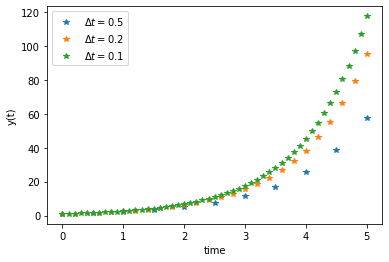

In [9]:
import numpy as np
import matplotlib.pyplot as plt

step = [0.5, 0.2, 0.1] ## step size
y0 = 1 ## initial condition
T = 5 ## final time T


for dt in step:
    N = int(T/dt) ## number of steps
    
    t = np.zeros(N+1)
    y = np.zeros(N+1)

    t[0] = 0
    y[0] = y0

    for n in range(N): ## Euler's method
        t[n+1] = t[n] + dt
        y[n+1] = (1 + dt)*y[n]
    
    plt.plot(t,y,'*')
    

plt.xlabel('time')
plt.ylabel('y(t)')
plt.legend([f"$\Delta t={dt}$" for dt in step])
plt.show()


Although Euler's method is simple to use, it is not particularly efficient.  

However, it is the prototype for a collection of more advanced numerical methods of solving a differential equation by a step-by-step process (for example, the Runge-Kutta method explained in our textbook, Section 1.16). 

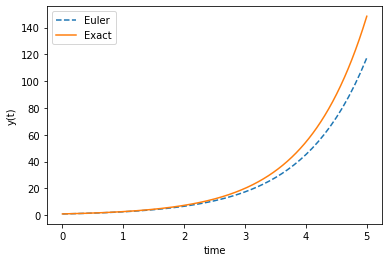

In [10]:
step = 0.2
y0 = 1

T = 5
N = int(T/dt)

t = np.zeros(N+1)
y = np.zeros(N+1)

t[0] = 0
y[0] = y0

for n in range(N):
    t[n+1] = t[n] + dt
    y[n+1] = (1 + dt)*y[n]


tspan = np.linspace(0, T, 1000)
ysol = np.exp(tspan)


plt.plot(t,y,'--')
plt.plot(tspan,ysol)
plt.xlabel('time')
plt.ylabel('y(t)')

plt.legend(['Euler','Exact'])
plt.show()


# Solving ODEs with Python

Differential equations are solved in Python with the Scipy.integrate package using function `odeint` (or `solve_ivp`). It is a straightforward tool for numerically integrating ODEs in *normal form*:
\begin{gather}
y' = F(y,t)
\end{gather}
Note that 'odeint' handles both stiff and non-stiff ODEs.

In [11]:
from scipy.integrate import odeint

After importing the `odeint` package, we need to define a function `dydt` that will return the right hand side of the ODE. 

As a first example, let us try to integrate the ODE given in the previous example:
\begin{align}
&y' = y \\ 
&y(0) = y_0
\end{align}

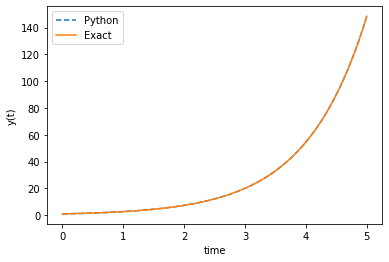

In [12]:
def dydt(y,t): # Define a function which calculates the derivative
    return y


ynum = odeint(dydt, y0, tspan)


plt.plot(tspan,ynum,'--')
plt.plot(tspan,ysol)

plt.xlabel('time')
plt.ylabel('y(t)')

plt.legend(['Python','Exact'])
plt.show()


We can even plot the error between the exact solution and the numerical one:

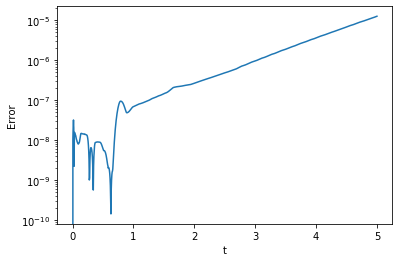

In [13]:
ynum = np.squeeze(ynum)
error = np.abs(ysol - ynum)

plt.semilogy(tspan, error) ## using a log scale on the y-axis 
plt.ylabel('Error')
plt.xlabel('t')
plt.show()

### Example 1 -- The Hill equation

\begin{gather}
y' = - \frac{Q y^p}{K+y^p}
\end{gather}
This equation is called the Hill equation and arises in enzymatic reaction. Despite it being a separable equation, it is difficult to solve in general for $y$ as an explicit function of $t$. 

The constants $Q,K, p \in \mathbb R_+$ are parameters. 


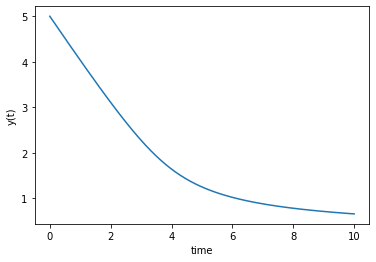

In [14]:
def dydt(y,t,Q,K,p): # Define a function, with parameters, which calculates the derivative
    return - (Q*np.power(y,p))/(K+np.power(y,p))

Q = 1
K = 5
p = 3.3

y0 = 5

tspan = np.linspace(0,10,1000)
ynum = odeint(dydt, y0, tspan,args=(Q,K,p,))
                               
plt.plot(tspan,ynum)

plt.xlabel('time')
plt.ylabel('y(t)')

plt.show()



### Example 2 -- The skydiver

Consider a skydiver jumping from a plane. Using Newton's laws of force balance, the governing equation is
\begin{gather}
y'' = -g + \frac{\rho}{m}\left(y'\right)^2
\end{gather}
This is a second order ODE. In order to use our solvers we first need to transform it into a first order equation
\begin{gather}
\begin{cases}
y' = v \\
v' = -g + \frac{\rho}{m}v^2
\end{cases}
\end{gather}
We are now dealing with a system of ODEs, but the numerical integration is the same (the output `ynum` will be a 2-dimensional array $y_{\rm num}  = \begin{bmatrix} y \\ v \end{bmatrix}$ ). 

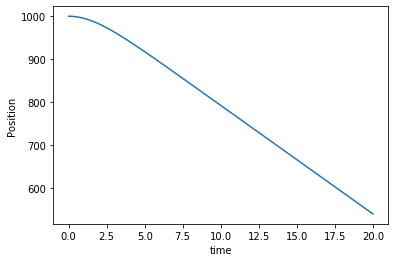

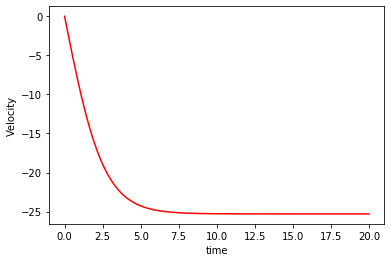

In [15]:
g = 9.8 # fictitious gravitational constant
rho = 1.225 # air density
m = 80 # mass of the skydiver

def dydt(Y, t): # Here Y is a vector such that Y[0]=y and Y[1]=v
    return [Y[1], -g + rho/m*np.power(Y[1],2)]

Y0 = [1000, 0]

tspan = np.linspace(0, 20, 1000)
ynum = odeint(dydt, Y0, tspan)

plt.plot(tspan,ynum[:,0])

plt.xlabel('time')
plt.ylabel('Position')

plt.show()

plt.plot(tspan,ynum[:,1],'red')

plt.xlabel('time')
plt.ylabel('Velocity')

plt.show()



### Example 3 -- The harmonic oscillator

Consider the (second-order) ODE describing the motion of a damped harmonic oscillator with the possible presence of a driving force,
\begin{align}
&y''+y′+2y=\cos(2t)\\
&y(0)=0 \\
&y′(0)=0
\end{align}
 
As in the previous example, we can turn this equation into a system of two first-order equations
\begin{align}
& y' = v \\
& v' = -2y - v + \cos(2t)\\
& y(0) = 0\\
& v(0) = 0
\end{align}

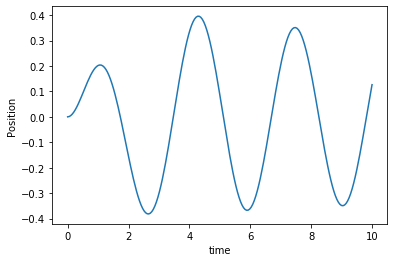

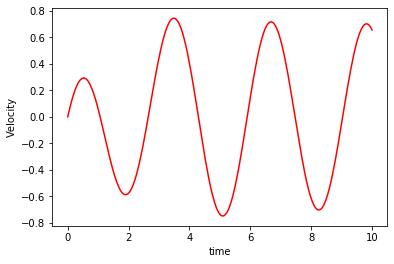

In [16]:
def dydt(Y, t):
    return [Y[1], -2*Y[0] - Y[1]+np.cos(2*t)] #[Y[1], -2*Y[0] - 2*Y[1]]

Y0 = [0, 0] # [5,-10]

tspan = np.linspace(0, 10, 200)
ynum = odeint(dydt, Y0, tspan)

plt.plot(tspan,ynum[:,0])

plt.xlabel('time')
plt.ylabel('Position')

plt.show()

plt.plot(tspan,ynum[:,1],'red')

plt.xlabel('time')
plt.ylabel('Velocity')

plt.show()

We can also easily plot the **phase space**:

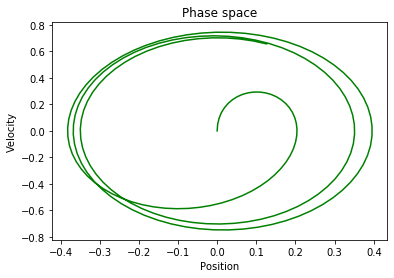

In [44]:
plt.plot(ynum[:,0],ynum[:,1],'green')

plt.xlabel('Position')
plt.ylabel('Velocity')
plt.title('Phase space')

plt.show()

and the **force field**:

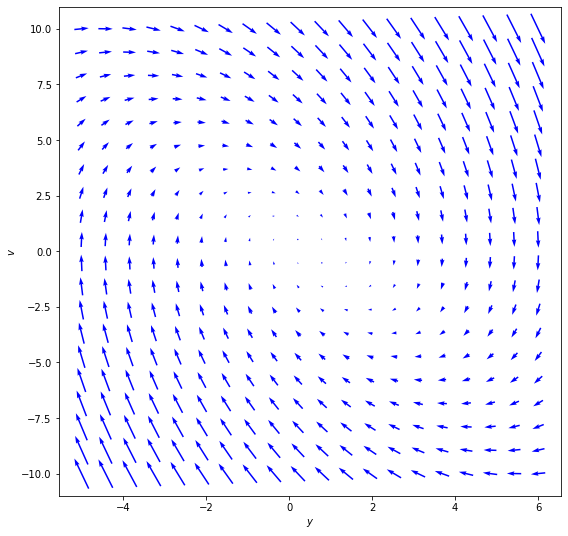

In [19]:
y1 = np.linspace(-5, 6, 20)
y2 = np.linspace(-10, 10, 20)

Y1, Y2 = np.meshgrid(y1, y2)

t = 0

u, v = np.zeros(Y1.shape), np.zeros(Y2.shape)
NI, NJ = Y1.shape


for i in range(NI): ## plot vector field
    for j in range(NJ):
        x = Y1[i, j]
        y = Y2[i, j]
        yprime = dydt([x, y], t)
        u[i,j] = yprime[0]
        v[i,j] = yprime[1]

        
plt.figure(figsize=(9, 9))

#fig, ax = plt.subplots(figsize=(9,9))


plt.quiver(Y1, Y2, u, v,color='blue',pivot='mid')

#plt.plot(ynum[:,0],ynum[:,1],'green')
plt.xlabel('$y$')
plt.ylabel('$v$')
plt.show()

### 3D Systems -- Lorenz system

Lorenz system is a simplified mathematical model for atmospheric convection (proposed by Lorenz in 1963):
\begin{align}
&x' = \sigma (y - x)\\
&y' = \rho x - y - xz\\
&z' = xy - \beta z
\end{align}

We will study this system in more details when we'll talk about chaos and bifurcation theory.
A sample solution in the *Lorenz attractor* is when $\rho = 28$, $\sigma = 10$ and $\beta = \frac{8}{3}$.


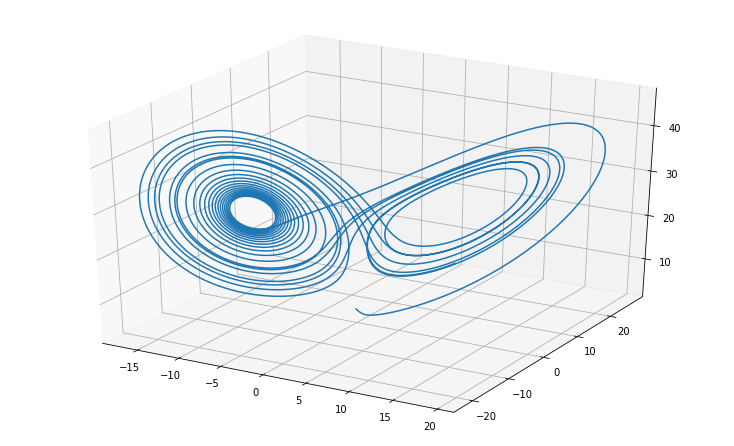

In [20]:
from mpl_toolkits.mplot3d import Axes3D

def lorenz(Y, t0, sigma=10., beta=8./3, rho=28.0):
    x, y, z = Y
    return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]


Y0 = [-1, 2, 3]

tspan = np.linspace(0, 20, 10000)
yp = odeint(lorenz, Y0, tspan)

y1,y2,y3=yp.T

fig = plt.figure(figsize=(10, 6))
ax = Axes3D(fig)
ax.plot(y1,y2,y3)

plt.show()

# Symbolic computation

Although primarily designed for numerical calculations, Python has also a library, called `Sympy`, that allows to perform computations using symbolic algebra. This feature can be used to obtain analytical solutions to some differential equations via the `dsolve` command. 

For an overall description of the package and additional details of its capabilities, you can have a look at this webpage [Scipy-lectures](https://scipy-lectures.org/packages/sympy.html) or the official [Sympy homepage](https://www.sympy.org/en/index.html).


We start by importing the library and creating symbolic variables.

In [31]:
import sympy as sym
from sympy import Symbol, symbols, dsolve, Function, Derivative, Eq

y = Function("y")
t = Symbol('a, t')

We can now find the general solution of a differential equation. E.g.
\begin{gather}
y' = -5y
\end{gather}
Remember that general solutions of an ODE will have integration constants (which can only be determined once ICs are given).

In [32]:
dy = Derivative(y(t), t)
dsolve(dy + 5*y(t), y(t))

Eq(y(a, t), C1*exp(-5*a, t))

We can also introduce parameters into our calculations (and specify their nature: e.g. $\alpha >0$, $\gamma \in \mathbb R$, etc.) and numerically evaluate the resulting function.

In [37]:
u = Function('u')
t = Symbol('t')
a = Symbol('a',real=True,positive=True)
usol = dsolve(Derivative(u(t), t, 2)+a**4*u(t), u(t)) ## this is the harmonic oscillator: y'' + a^4y=0
usol

Eq(u(t), C1*sin(a**2*t) + C2*cos(a**2*t))

In [43]:
C1, C2 = symbols('C1,C2')
y3 = usol.subs({C1:2, C2:3, a:np.sqrt(2), t:np.pi})
y3

Eq(u(3.14159265358979), 3.0)

Additional optional can be input in the command `dsolve` in order to help find the best possible solution. For example, if you know that the given euqation is separable, you can use keyword `hint='separable'` to force `dsolve` to resolve it as a separable equation.

Example: 
\begin{gather}
\sin(t) \sin(y) + y' \cos(t)\cos(y) = 0 \qquad \Leftrightarrow \qquad y' = -\tan(t) \tan(y)
\end{gather}

In [47]:
y = Function('y')
t = Symbol('t')

sym.dsolve(sym.sin(t) * sym.cos(y(t)) + sym.cos(t) * sym.cos(y(t)) * y(t).diff(t), y(t), hint='separable') 

Eq(y(t), C1 + log(cos(t)))

# Exercises

A collection of exercises to have fun with Python and ODEs.

#### First order ODEs

Find the general solution of the following ODEs:
1. $(1-t^2)y' -ty = (1-t^2)^{\frac{1}{2}}$
2. $y' = (t-4)e^4t + ty$
3. $tww' = t^4+ w^2$, by putting $w^2=y$


In each case, write a Python program to verify your solution by solving the differential equation numerically with an initial condition $y(0)=1$, and plotting the numerical and the analytical solutions on the same graph over the time interval $I = (0, 10)$. 

#### Spring-mass-dashpot system 

Consider the spring-mass-dashpot system
\begin{gather}
m y'' + c y' + k y = F(t)
\end{gather}
where $m,c,k \in \mathbb R_+$; $m$ is the mass of the object which is hanging on a spring, $c$ is the damping constant and $k$ is the spring constant. $F(t)$ is the (optional) external force acting on the system. 


Plot the numerical solution of the differential equation in the following cases, where you can assume initial conditions $y(0) = 1$ and $y'(0)=1$:
1. *Free vibrations*: $m=1$, $c=0$, $k=2$, $F(t) = 0$; $I = (0,10)$.
2. *Damped free vibrations*: $m=1$, $F(t) =0$; $I = (0,10)$.
    - overdamped: $c=7$, $k=1$; $I= (0,5)$.
    - critically damped: $c=\frac{1}{2}$, $k=\frac{1}{16}$; $I  = (0,20)$.
    - underdamped: $c=\frac{1}{2}$, $k=20$; $I = (0,10)$.
3. *Damped forced vibrations*: $m=1$, $c=1$, $k=5$, $F(t) = \cos(\pi t)$ ; $I = (0,10)$
4. *Forced free vibrations*: $m=1$, $c=0$, $k=4$, $F(t) = 10 \cos(2t)$; $I = (0,40)$ 

(notice that $\sqrt{k} = 2$ as in the argument of the external force: what happens for large times? This is the case that we discussed in class about the Tacoma bridge disaster)


Feel free to variate those parameters and see how the solution looks like.

#### Linear system of ODEs

Find the general solution of the following systems and decide whether the origin is stable/asymptotically stable/unstable.  

Then, compare your conclusions with the numerical results: plot the phase portrait of the system and plot some solutions with arbitrarily chosen initial condition $(x_0,y_0)$.


1. $x' = -2x, \ y' = x-4y$

2. $x' = x, \ y' = -y$

3. $x' = -x, \ y' = -y$

4. $x' = -x+2y, \ y' = -y$

5. $x' = 3y, \ y' = -x$

6. $x' = x-8y, \ y' = 8x+y$


#### Non-homogeneous linear system of ODEs
Find the equilibrium point(s) of the following system and determine their stability properties. Compare your conclusion with the numerical results by plotting the phase portrait of the system and some solutions with arbitrarily chosen initial condition $(x_0,y_0)$.

\begin{align}
&x' = -2x-6y+8\\
&y' = 8x+4y-12
\end{align}




#### Non-linear conservative systems
Derive the potential energy that describes the motion of the physical system described below and deduce the phase portrait. 

1. $y'' + \frac{1}{2}(y^2-1)=0$ 
2. $y'' + 4y^3 - 4y =0 $ 
3. Pendulum equation: $y'' + \frac{1}{2} \sin(y) =0$


For each of the equations, plot numerically the vector field of the phase portrait and on the same graph plot the orbits with the prescribed initial conditions. 

1. $y'' + \frac{1}{2}(y^2-1)=0$ with initial conditions $(x_0,y_0)$: 
\begin{gather}
  (-4.5, 4.5), \quad (-4,4.25), \quad (-4,5), \quad  (0,0), \quad(1/2,0),  \quad (0.8,0);
\end{gather}

2. $y'' + 4y^3 - 4y =0 $ with initial conditions $(x_0,y_0)$: 
\begin{gather}
(0.1,0.1), \quad  (-0.1,0.1),  \quad (\pm 0.8,0), \quad (0,1), \quad  (0,2).
\end{gather}

3. Pendulum equation $y'' + \frac{1}{2} \sin(y) =0$ with initial conditions $(x_0,y_0)$: 
\begin{gather}
(\pm 3,0), \quad (\pm 2,0),  \quad (-6,0.5), \quad (6,-0.5).
 \end{gather}
 
 
 #### Phase portraits for $3$-dimensional systems
 
 Plot the (3D) phase portrait of the following systems:

1. A linear system (+ non-homogeneity):
\begin{gather}
{\bf x}\, ' = \begin{bmatrix} 0&  -1&  0\\ 1 &  0 &  0\\  0 & 0 & -\frac{1}{10}\end{bmatrix} {\bf x} + {\bf f}(t)
\end{gather}
with 
    - ${\bf f}(t) = {\bf 0}$;
    - ${\bf f}(t) = [\cos(t), 1,1]^\top$;
    - ${\bf f}(t) = [\cos(x), 0 ,0]^\top$.


2. Rössler system: it is a system of three non-linear ordinary differential equations modelling equilibrium in chemical reactions (studied by Rössler in 1976). For this exercise, we set $\alpha = 0.2$, $\beta = 0.2$ and $\gamma = 5.7$.
\begin{align}
&x' = -y-z\\
&y' = x+\alpha y\\
&z = \beta+z(x-\gamma)
\end{align}





#### References


- A. D. Lewis, *Introduction to differential equations (for smart kids)*, for the course MTHE 237 at Queens University, Kingston (ON), Canada.
- Dr. S. Dolan's [course MAS212](https://sam-dolan.staff.shef.ac.uk/mas212/notebooks/ODE_Example.html) at University of Sheffield, UK.
- J. Sundnes, *Solving ODE's in Python* [link](https://sundnes.github.io/solving_odes_in_python/).
- H. Fangohr, *Introduction to Python for Computational Science and Engineering*, [link](https://www.southampton.ac.uk/~fangohr/teaching/python/book/html/12-symbolic-computation.html).